<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diego Alvarez Jeria</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub. 

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub. 

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [33]:
# Diego-Alv
# https://github.com/Diego-Alv/Actividad-AlvarezDiego

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2} 
$$

$$
f(z) =  ysin(x) 
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

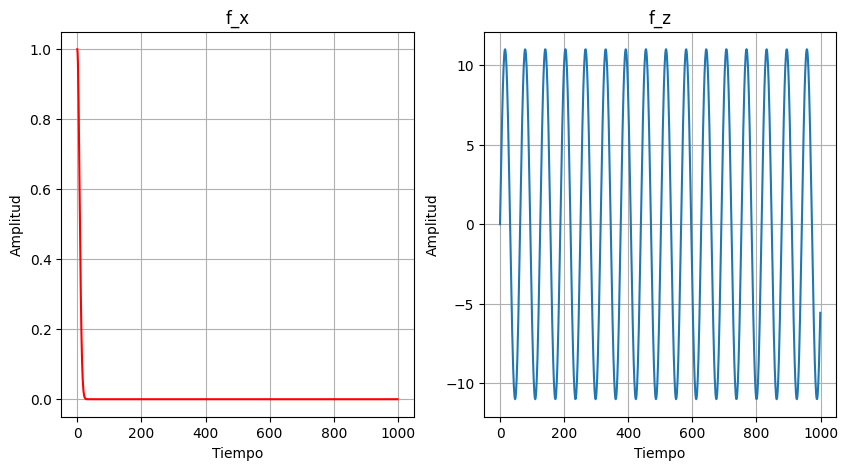

In [34]:
import numpy as np 
import matplotlib.pyplot as plt


x = np.linspace(0,100,1000)
y = np.random.randint(0,100)
f_x = np.exp(-x**2)
f_z = y*np.sin((x))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)  # Fila, Columna, numero grafico
plt.plot(f_x,color="red")
plt.title("f_x")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(1,2,2) # Segundo grafico
plt.plot(f_z)
plt.title("f_z")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


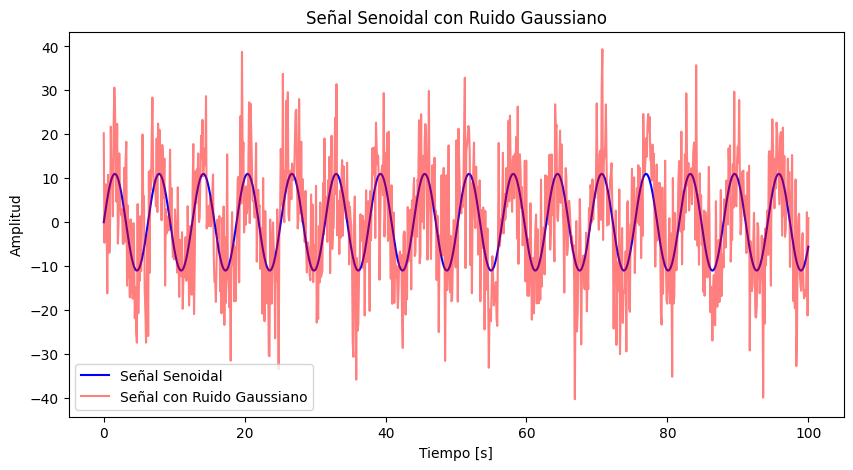

In [35]:
ruido_gaussiano = np.random.normal(0, 10, size=x.shape)

señal_con_ruido = f_z + ruido_gaussiano
plt.figure(figsize=(10,5))

plt.plot(x, f_z, label="Señal Senoidal", color='blue')
plt.plot(x, señal_con_ruido, label="Señal con Ruido Gaussiano", color='red', alpha=0.5)
plt.title("Señal Senoidal con Ruido Gaussiano")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()

plt.show()


### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

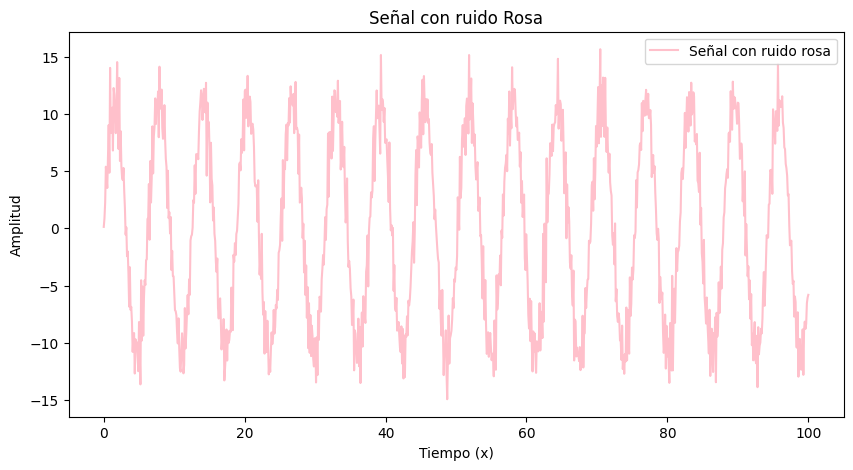

In [36]:
# Generar ruido blanco
ruido_blanco = np.random.normal(0, 1, len(x))

# Crear un filtro para generar ruido rosa aproximado (filtrado de ruido blanco)
# La aproximación simple será multiplicar la FFT del ruido blanco por un factor que reduzca la potencia

frecuencias = np.fft.fftfreq(len(x), x[1] - x[0])
filtro = np.sqrt(np.abs(frecuencias))  
filtro[0] = 0  # Evitar la división por cero 

# Transformada rápida de Fourier 
fft_ruido_blanco = np.fft.fft(ruido_blanco)

# Aplicamos el filtro
fft_ruido_rosa = fft_ruido_blanco * filtro

# Invertimos la FFT para obtener el ruido rosa en el dominio del tiempo
ruido_rosa = np.fft.ifft(fft_ruido_rosa).real

# Señal con ruido rosa
senal_con_ruido_rosa = f_z + ruido_rosa

# Graficar la señal con ruido rosa
plt.figure(figsize=(10 , 5))
plt.plot(x, senal_con_ruido_rosa, label='Señal con ruido rosa', color='pink')
plt.title('Señal con ruido Rosa')
plt.xlabel('Tiempo (x)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


# El ruido gaussiano

El ruido gaussiano corresponde a un tipo de ruido blanco mientras el ruido rosa es un ruido blanco filtrado. El ruido gaussiano tiene una distribucion normal. El ruido rosa disminuye la energia a medida que sube la frecuencia.

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a